<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_5_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [199]:
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from numpy import average
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [149]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_ML


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



In [30]:
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = tts(cancer['data'], cancer['target'], test_size=0.3, random_state=1)

In [ ]:
#svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy 0.9649122807017544
Precision 0.9553571428571429
Recall 0.9907407407407407
F1 0.9727272727272727
[[ 58   5]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



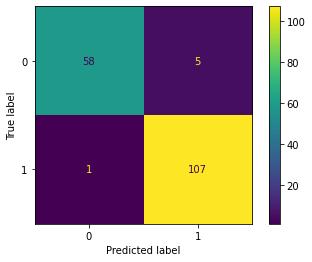

In [54]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict)
svm_rs = m.recall_score(y_test, y_predict)
svm_fs = m.f1_score(y_test, y_predict)
print('Accuracy',svm_ac)
print('Precision',svm_ps)
print('Recall',svm_rs)
print('F1',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

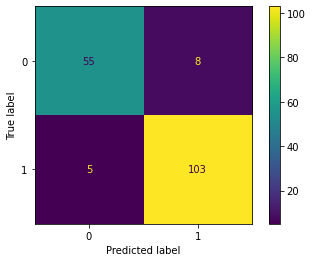

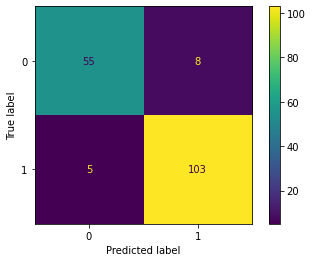

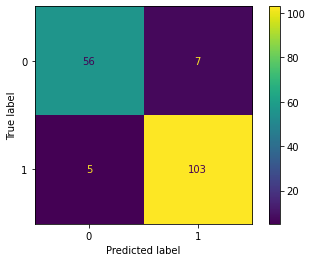

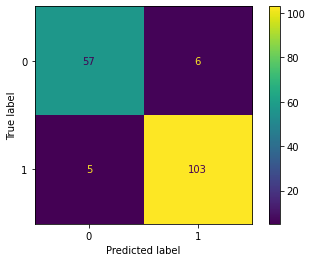

In [33]:
#KNN
k_range = range(1, 8, 2)
KNN_score = {'Accuracy': [], 'Precision' :[], 'Recall' : [], 'F1' :[]}
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  y_predict = KNN.predict(x_test)
  KNN_score['Accuracy'].append(m.accuracy_score(y_test, y_predict))
  KNN_score['Precision'].append(m.precision_score(y_test, y_predict))
  KNN_score['Recall'].append(m.recall_score(y_test, y_predict))
  KNN_score['F1'].append(m.f1_score(y_test, y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

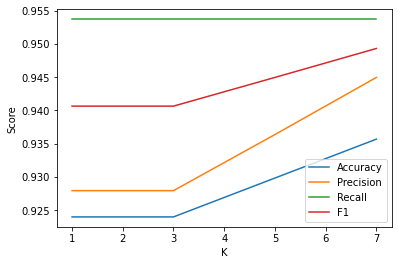

In [34]:
plt.plot(k_range, KNN_score['Accuracy'], label='Accuracy')
plt.plot(k_range, KNN_score['Precision'], label='Precision')
plt.plot(k_range, KNN_score['Recall'], label='Recall')
plt.plot(k_range, KNN_score['F1'], label='F1')
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()

In [ ]:
#LogisticRegression
LGR = LogisticRegression(random_state=0)
LGR.fit(x_train, y_train)

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy 0.9473684210526315
Precision 0.9459459459459459
Recall 0.9722222222222222
F1 0.9589041095890412
[[ 57   6]
 [  3 105]]


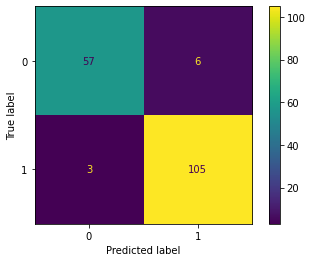

In [36]:
y_predict = LGR.predict(x_test)
print(y_predict)
l_ac = m.accuracy_score(y_test, y_predict)
l_ps = m.precision_score(y_test, y_predict)
l_rs = m.recall_score(y_test, y_predict)
l_fs = m.f1_score(y_test, y_predict)
print('Accuracy',l_ac)
print('Precision',l_ps)
print('Recall',l_rs)
print('F1',l_fs)
print(m.confusion_matrix(y_test, y_predict))
m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

[Text(0.4166666666666667, 0.9166666666666666, 'x[22] <= 104.95\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'), Text(0.19047619047619047, 0.75, 'x[27] <= 0.135\ngini = 0.049\nsamples = 237\nvalue = [6, 231]'), Text(0.09523809523809523, 0.5833333333333334, 'x[13] <= 48.975\ngini = 0.009\nsamples = 225\nvalue = [1, 224]'), Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 222\nvalue = [0, 222]'), Text(0.14285714285714285, 0.4166666666666667, 'x[18] <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'), Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.2857142857142857, 0.5833333333333334, 'x[21] <= 26.9\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'), Text(0.23809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'), Text(0.3333333333333333, 0.4166666666666667, 'x[19] <= 0.003\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'), Text(0.28571428

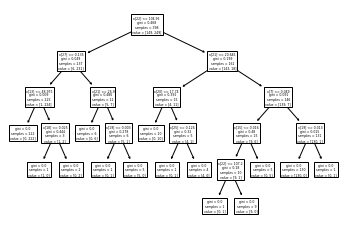

In [52]:
#tree
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x_train,y_train)
print(tree.plot_tree(clf))

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy: 0.9649122807017544
Precision: 0.9553571428571429
Recall: 0.9907407407407407
F1: 0.9727272727272727
[[ 58   5]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



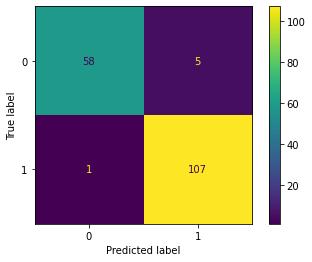

In [55]:
y_predict = clf.predict(x_test)
print(y_predict)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict)
tree_rs = m.recall_score(y_test, y_predict)
tree_fs = m.f1_score(y_test, y_predict)
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [57]:
t = PrettyTable(['Classification' ,'Accuracy', 'Precison', 'Recall', 'F1'])
SVM =['SVM', str(round(svm_ac,2)), str(round(svm_ps,2)), str(round(svm_rs,2)), str(round(svm_fs,2))]
index_max = KNN_score['Accuracy'].index(max(KNN_score['Accuracy']))
KNN = ['KNN', str(round(KNN_score['Accuracy'][index_max],2)), str(round(KNN_score['Precision'][index_max],2)), str(round(KNN_score['Recall'][index_max],2)), str(round(KNN_score['F1'][index_max],2))]
LogisticRegression = ['Logistic Regression', str(round(l_ac,2)),str(round(l_ps,2)), str(round(l_rs,2)), str(round(l_fs,2))]
Tree = ['Decision Tree', str(round(tree_ac,2)), str(round(tree_ps,2)), str(round(tree_rs,2)), str(round(tree_fs,2))]
t.add_rows([SVM, KNN, LogisticRegression, Tree])
print(t)

+---------------------+----------+----------+--------+------+
|    Classification   | Accuracy | Precison | Recall |  F1  |
+---------------------+----------+----------+--------+------+
|         SVM         |   0.96   |   0.96   |  0.99  | 0.97 |
|         KNN         |   0.94   |   0.94   |  0.95  | 0.95 |
| Logistic Regression |   0.95   |   0.95   |  0.97  | 0.96 |
|    Decision Tree    |   0.96   |   0.96   |  0.99  | 0.97 |
+---------------------+----------+----------+--------+------+


#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





In [92]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=0)
Poly=['Polynomial Kernel']
Sigmoid = ['Sigmoid Kernel']
RBF = ['RBF Kernel']
Linear = ['Linear Kernel']

In [93]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815
F1: 0.975983436853002
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



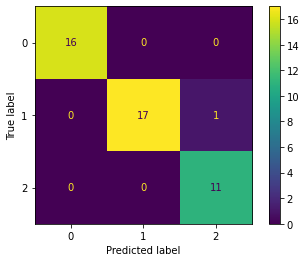

In [94]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

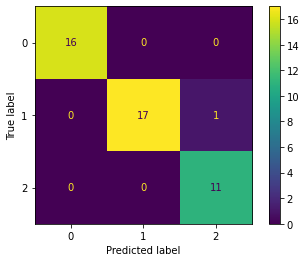

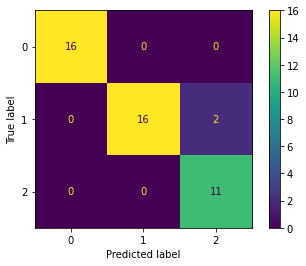

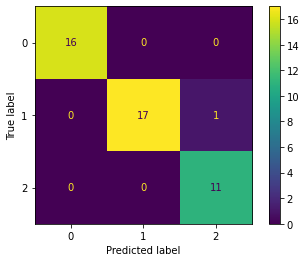

In [95]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [96]:
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))
Poly

['Polynomial Kernel', 0.98, 0.97, 0.98, 0.98]

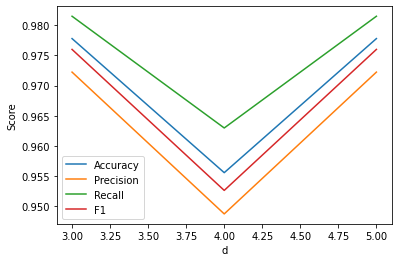

In [97]:
plt.plot(d_range, acc, label='Accuracy')
plt.plot(d_range, pre, label='Precision')
plt.plot(d_range, re, label='Recall')
plt.plot(d_range, f, label='F1')
plt.xlabel("d")
plt.ylabel("Score")
plt.legend()

In [98]:
#sigmoid
clf = svm.SVC(kernel ='sigmoid')
clf.fit(x_train,y_train)

SVC(kernel='sigmoid')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
Accuracy: 0.24444444444444444
Precision: 0.08148148148148147
Recall: 0.3333333333333333
F1: 0.13095238095238096
[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        18
           2       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.08      0.33      0.13        45
weighted avg       0.06      0.24      0.10        45



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: 

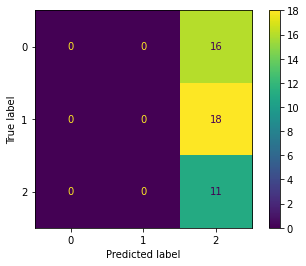

In [99]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [100]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815
F1: 0.975983436853002
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



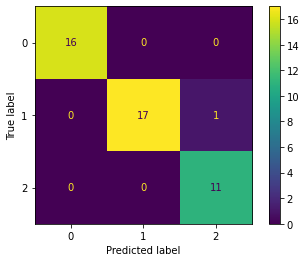

In [101]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [102]:
t = PrettyTable(['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_rows([Linear, Poly, Sigmoid, RBF])
print(t)

+-------------------+----------+-----------+--------+-------+
|       Kernel      | Accuracy | Precision | Recall |   F1  |
+-------------------+----------+-----------+--------+-------+
|   Linear Kernel   |   0.98   |    0.97   |  0.98  |  0.98 |
| Polynomial Kernel |   0.98   |    0.97   |  0.98  |  0.98 |
|   Sigmoid Kernel  |  0.244   |   0.081   | 0.333  | 0.131 |
|     RBF Kernel    |   0.98   |    0.97   |  0.98  |  0.98 |
+-------------------+----------+-----------+--------+-------+


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [104]:
mnist = datasets.load_digits()
x_train, x_test, y_train, y_test = tts(mnist['data'], mnist['target'], test_size=0.3, random_state=1)
Poly=['Polynomial Kernel']
Sigmoid = ['Sigmoid Kernel']
RBF = ['RBF Kernel']
Linear = ['Linear Kernel']

In [105]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 8 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 3 3 9 8 7 0 2 3 9 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 1 0 2 6 9 3 

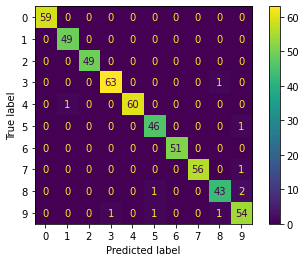

In [106]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

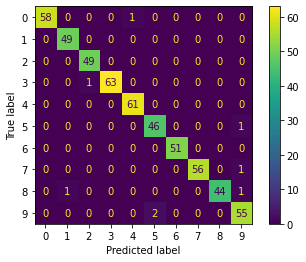

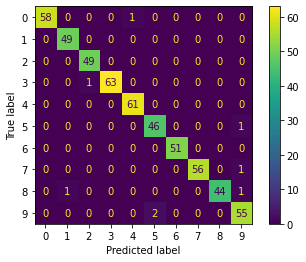

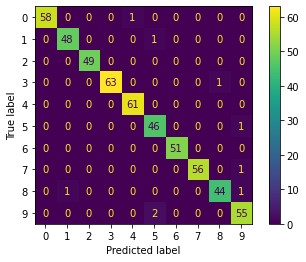

In [107]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [108]:
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))
Poly

['Polynomial Kernel', 0.99, 0.99, 0.99, 0.98]

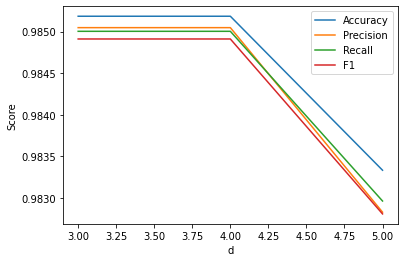

In [109]:
plt.plot(d_range, acc, label='Accuracy')
plt.plot(d_range, pre, label='Precision')
plt.plot(d_range, re, label='Recall')
plt.plot(d_range, f, label='F1')
plt.xlabel("d")
plt.ylabel("Score")
plt.legend()

In [110]:
#sigmoid
clf = svm.SVC(kernel ='sigmoid')
clf.fit(x_train,y_train)

SVC(kernel='sigmoid')

[8 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 7 6 1 3 7 5 9 8 3 2 9 8
 1 7 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 8 0 2 1 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 5 4 2 3 9 2 3 3 0 2 9 5 2 3
 2 8 1 7 9 1 2 0 1 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 8 5 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 1 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 9 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 9 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 1 9 4 7 1 3 7 8
 7 6 9 8 1 2 6 8 7 5 5 6 9 9 9 1 0 0 4 9 3 0 4 9 4 2 5 0 9 6 4 2 6 0 4 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 2 9 8 7 0 1 3 9 9 2 8 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 4 9 4 5
 7 2 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 6 2 5 3 3 3 5 7 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

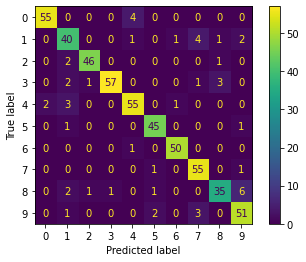

In [112]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid.append(str(round(svm_ac,2)))
Sigmoid.append(str(round(svm_ps,2)))
Sigmoid.append(str(round(svm_rs,2)))
Sigmoid.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [113]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

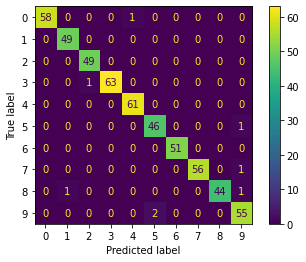

In [114]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

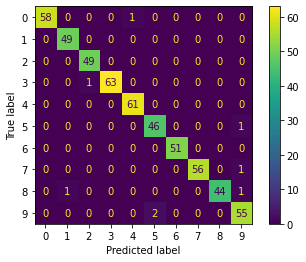

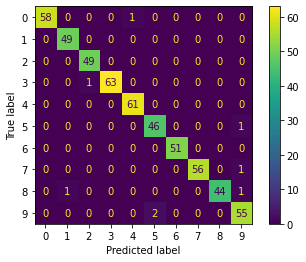

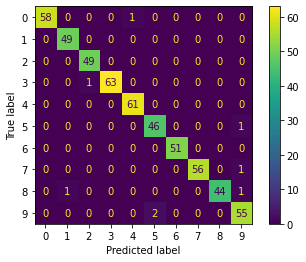

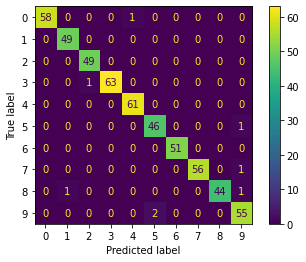

In [116]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred, average='macro'))
  recall.append( m.recall_score(y_test, pred, average='macro'))
  f1.append(m.f1_score(y_test, pred, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

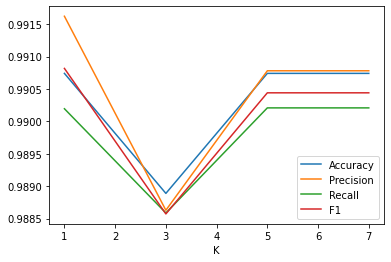

In [117]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [147]:
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 1 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 3 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 2 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 8 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 4 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 3 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 2 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 1 0 2 6 9 3 

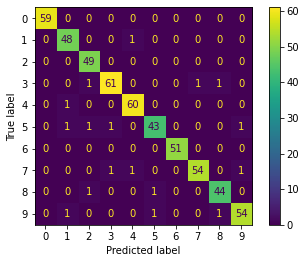

In [132]:
y_predict = logistic.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[Text(0.24443112143987342, 0.96875, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1257\nvalue = [119, 133, 128, 119, 120, 135, 130, 122, 128, 123]'), Text(0.05617088607594937, 0.90625, 'x[42] <= 5.0\ngini = 0.545\nsamples = 187\nvalue = [119, 0, 2, 0, 3, 20, 4, 0, 3, 36]'), Text(0.02531645569620253, 0.84375, 'x[21] <= 8.0\ngini = 0.461\nsamples = 53\nvalue = [0, 0, 1, 0, 0, 17, 0, 0, 0, 35]'), Text(0.012658227848101266, 0.78125, 'x[4] <= 6.0\ngini = 0.111\nsamples = 17\nvalue = [0, 0, 1, 0, 0, 16, 0, 0, 0, 0]'), Text(0.006329113924050633, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'), Text(0.0189873417721519, 0.71875, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 0, 0, 16, 0, 0, 0, 0]'), Text(0.0379746835443038, 0.78125, 'x[26] <= 15.5\ngini = 0.054\nsamples = 36\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 35]'), Text(0.03164556962025317, 0.71875, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 35]'), Text(0.04430379746835443, 0.71875, 'gini = 0.0\nsamples =

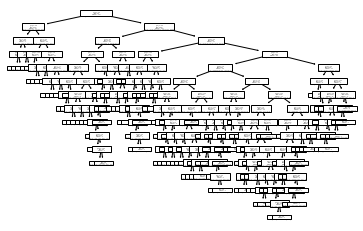

In [176]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
print(tree.plot_tree(clf))

[1 5 0 7 1 0 7 1 5 4 9 2 7 8 4 4 9 9 7 4 7 4 8 6 0 7 6 1 3 7 5 9 9 3 2 8 8
 1 1 0 7 1 0 0 8 7 2 7 1 3 4 3 4 0 6 7 0 5 9 5 2 1 7 0 5 1 1 3 3 4 0 3 7 2
 1 4 2 1 7 3 2 5 3 4 1 5 5 2 5 2 2 8 2 7 0 8 1 7 4 8 9 8 2 3 9 0 8 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 4 5 6 3 8 3 7 1 8 5 9 4 4 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 9 0 9 3 5 1 2 3 2 9 0 7 6 2 9 3
 5 3 4 6 9 3 7 4 4 8 7 6 1 5 8 6 0 3 3 5 9 9 3 4 9 5 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 7 6 3 3 2 9 1 6 1 0 4 2 2 7 9 1 6 7 6 3 4 1 5 3 4 0 6 4 8 9
 3 6 3 1 4 0 4 4 8 5 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 3 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 3 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 4 5 5 6 1 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 4
 7 5 5 2 5 1 8 9 8 7 7 0 6 9 3 1 2 3 9 8 7 0 2 3 9 9 2 8 1 9 8 3 0 0 7 3 8
 7 1 9 7 1 0 4 5 4 3 7 3 6 5 4 9 2 5 9 1 4 5 0 4 3 4 2 7 9 0 2 7 8 4 9 4 5
 7 1 3 7 8 3 3 6 4 7 1 0 8 9 2 2 5 4 1 2 5 9 3 3 6 1 4 7 6 2 3 6 2 5 2 6 4
 5 2 4 9 7 9 5 0 2 6 9 3 

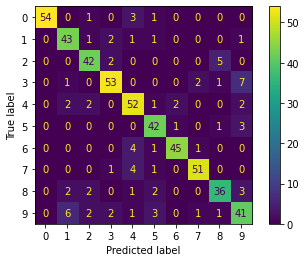

In [177]:
y_predict = clf.predict(x_test)
print(y_predict)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict, average='macro')
tree_rs = m.recall_score(y_test, y_predict, average='macro')
tree_fs = m.f1_score(y_test, y_predict, average='macro')
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [178]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_rows([Logistic, KNN, Tree, Linear, Poly, Sigmoid, RBF])
print(t)

+---------------------+----------+-----------+--------+------+
|    Classification   | Accuracy | Precision | Recall |  F1  |
+---------------------+----------+-----------+--------+------+
| Logistic Regression |   0.97   |    0.97   |  0.97  | 0.97 |
|         KNN         |   0.99   |    0.99   |  0.99  | 0.99 |
|         Tree        |   0.85   |    0.85   |  0.85  | 0.85 |
|    Linear Kernel    |   0.98   |    0.98   |  0.98  | 0.98 |
|  Polynomial Kernel  |   0.99   |    0.99   |  0.99  | 0.98 |
|    Sigmoid Kernel   |   0.91   |    0.91   |  0.9   | 0.9  |
|      RBF Kernel     |   0.99   |    0.99   |  0.99  | 0.98 |
+---------------------+----------+-----------+--------+------+


#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [266]:
load_data = pd.read_csv('creditcard.csv')
data = load_data.head(int(load_data[['Class']].count()/4))
x =data.drop('Class', axis=1)
y = data[['Class']]
x_train, x_test, y_train, y_test = tts(x, y,test_size=0.3, random_state=1)
Poly=['Polynomial Kernel']
Sigmoid = ['Sigmoid Kernel']
RBF = ['RBF Kernel']
Linear = ['Linear Kernel']

In [287]:
print(data.count())
print(np.count_nonzero(data[['Class']] == 1))

Time      71201
V1        71201
V2        71201
V3        71201
V4        71201
V5        71201
V6        71201
V7        71201
V8        71201
V9        71201
V10       71201
V11       71201
V12       71201
V13       71201
V14       71201
V15       71201
V16       71201
V17       71201
V18       71201
V19       71201
V20       71201
V21       71201
V22       71201
V23       71201
V24       71201
V25       71201
V26       71201
V27       71201
V28       71201
Amount    71201
Class     71201
dtype: int64
177


In [267]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

[0 0 0 ... 0 0 0]
Accuracy: 0.9989700856701466
Precision: 0.78125
Recall: 0.625
F1: 0.6944444444444444
[[21314     7]
 [   15    25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21321
           1       0.78      0.62      0.69        40

    accuracy                           1.00     21361
   macro avg       0.89      0.81      0.85     21361
weighted avg       1.00      1.00      1.00     21361



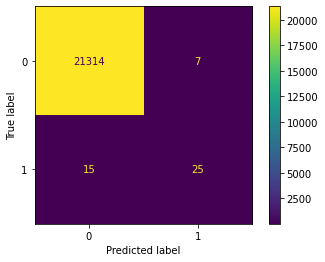

In [268]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict)
svm_rs = m.recall_score(y_test, y_predict)
svm_fs = m.f1_score(y_test, y_predict)
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `ze

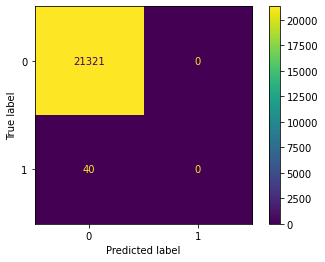

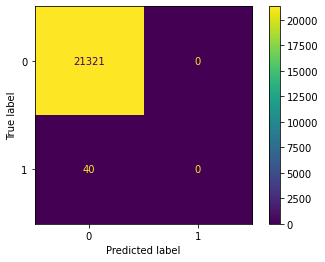

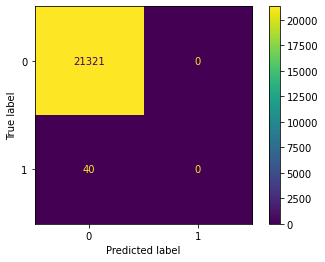

In [269]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict))
  re.append(m.recall_score(y_test, y_predict))
  f.append(m.f1_score(y_test, y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [270]:
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))
Poly

['Polynomial Kernel', 1.0, 0.0, 0.0, 0.0]

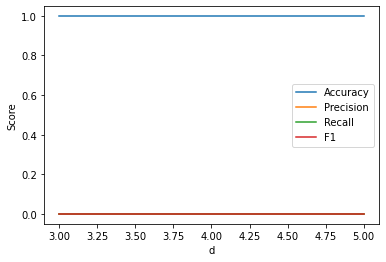

In [271]:
plt.plot(d_range, acc, label='Accuracy')
plt.plot(d_range, pre, label='Precision')
plt.plot(d_range, re, label='Recall')
plt.plot(d_range, f, label='F1')
plt.xlabel("d")
plt.ylabel("Score")
plt.legend()

In [272]:
#sigmoid
clf = svm.SVC(kernel ='sigmoid')
clf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

[0 0 0 ... 0 0 0]
Accuracy: 0.9981274284911755
Precision: 0.0
Recall: 0.0
F1: 0.0
[[21321     0]
 [   40     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21321
           1       0.00      0.00      0.00        40

    accuracy                           1.00     21361
   macro avg       0.50      0.50      0.50     21361
weighted avg       1.00      1.00      1.00     21361



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: Undefine

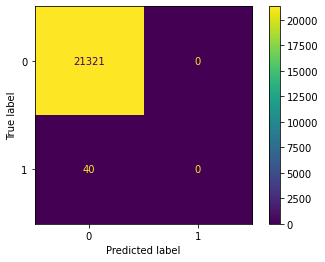

In [273]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict)
svm_rs = m.recall_score(y_test, y_predict)
svm_fs = m.f1_score(y_test, y_predict)
Sigmoid.append(str(round(svm_ac,2)))
Sigmoid.append(str(round(svm_ps,2)))
Sigmoid.append(str(round(svm_rs,2)))
Sigmoid.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [274]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9981274284911755
Precision: 0.0
Recall: 0.0
F1: 0.0
[[21321     0]
 [   40     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21321
           1       0.00      0.00      0.00        40

    accuracy                           1.00     21361
   macro avg       0.50      0.50      0.50     21361
weighted avg       1.00      1.00      1.00     21361



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


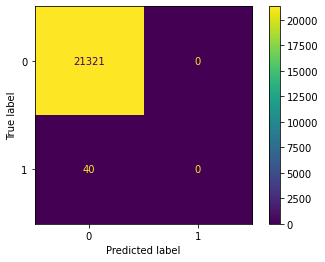

In [275]:
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict)
svm_rs = m.recall_score(y_test, y_predict)
svm_fs = m.f1_score(y_test, y_predict)
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

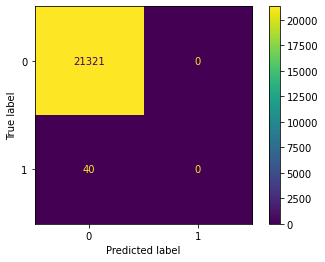

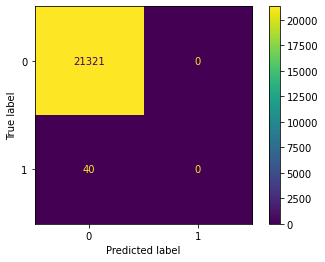

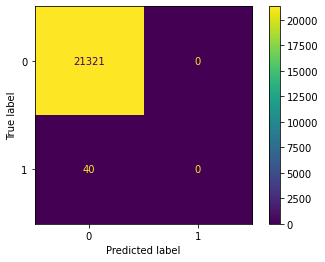

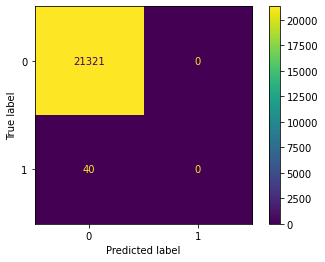

In [276]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

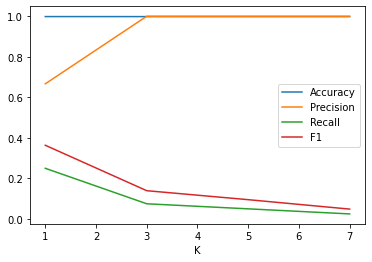

In [277]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [282]:
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

In [278]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9986891999438229
Precision: 0.7
Recall: 0.525
F1: 0.6
[[21312     9]
 [   19    21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21321
           1       0.70      0.53      0.60        40

    accuracy                           1.00     21361
   macro avg       0.85      0.76      0.80     21361
weighted avg       1.00      1.00      1.00     21361



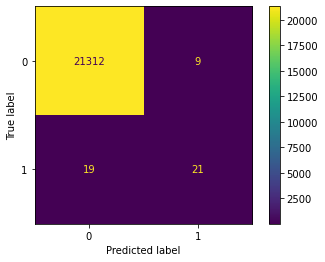

In [284]:
y_predict = logistic.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[Text(0.18098443675889328, 0.9722222222222222, 'x[12] <= -5.005\ngini = 0.005\nsamples = 49840\nvalue = [49703, 137]'), Text(0.08432147562582346, 0.9166666666666666, 'x[26] <= -0.275\ngini = 0.335\nsamples = 122\nvalue = [26, 96]'), Text(0.04216073781291173, 0.8611111111111112, 'x[20] <= 0.378\ngini = 0.337\nsamples = 28\nvalue = [22, 6]'), Text(0.021080368906455864, 0.8055555555555556, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'), Text(0.06324110671936758, 0.8055555555555556, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'), Text(0.12648221343873517, 0.8611111111111112, 'x[20] <= 1.787\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'), Text(0.10540184453227931, 0.8055555555555556, 'x[28] <= 0.538\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'), Text(0.08432147562582346, 0.75, 'gini = 0.0\nsamples = 75\nvalue = [0, 75]'), Text(0.12648221343873517, 0.75, 'x[26] <= -0.151\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'), Text(0.10540184453227931, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue =

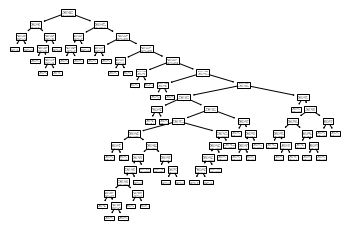

In [280]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
print(tree.plot_tree(clf))

[0 0 0 ... 0 0 0]
Accuracy: 0.9993914142596321
Precision: 0.813953488372093
Recall: 0.875
F1: 0.8433734939759036
[[21313     8]
 [    5    35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21321
           1       0.81      0.88      0.84        40

    accuracy                           1.00     21361
   macro avg       0.91      0.94      0.92     21361
weighted avg       1.00      1.00      1.00     21361



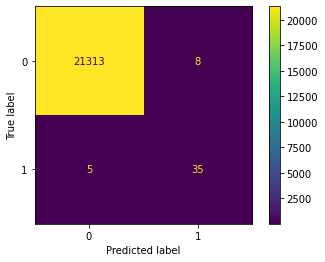

In [285]:
y_predict = clf.predict(x_test)
print(y_predict)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict)
tree_rs = m.recall_score(y_test, y_predict)
tree_fs = m.f1_score(y_test, y_predict)
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [286]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_rows([Logistic, KNN, Tree, Linear, Poly, Sigmoid, RBF])
print(t)

+---------------------+----------+-----------+--------+------+
|    Classification   | Accuracy | Precision | Recall |  F1  |
+---------------------+----------+-----------+--------+------+
| Logistic Regression |   1.0    |    0.7    |  0.52  | 0.6  |
|         KNN         |   1.0    |    1.0    |  0.02  | 0.05 |
|         Tree        |   1.0    |    0.81   |  0.88  | 0.84 |
|    Linear Kernel    |   1.0    |    0.78   |  0.62  | 0.69 |
|  Polynomial Kernel  |   1.0    |    0.0    |  0.0   | 0.0  |
|    Sigmoid Kernel   |   1.0    |    0.0    |  0.0   | 0.0  |
|      RBF Kernel     |   1.0    |    0.0    |  0.0   | 0.0  |
+---------------------+----------+-----------+--------+------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.